# Entrega Regresión Lineal Matemática 4 2024 #  
  
**Alumnos:**  
Luciano Ganzero 20430/3  
Luka Castiñeira 19469/4

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown, display
import time
import math

In [10]:
def imprimir_markdown(texto):
    display(Markdown(texto))

In [11]:
df = pd.read_csv('players_21.csv')
cols_to_drop = df.select_dtypes(include=['object']).columns
df = df.drop(columns=cols_to_drop)
df = df.dropna(axis=0, how='all')


## Parte 1: Predicción del valor de mercado ##

### a) Recta de regresión para predecir el valor de mercado de un jugador a partir de la característica más relevante (a la que se destinará mayor proporción del presupuesto) ###  
Mi objetivo es predecir el valor de mercado de un jugador, por lo tanto, esta será mi variable dependiente Y.<br>
Para ello, yo voy a elegir la caracteristica más relevante, que sera mi variable independiente X. La variable elegida es "wage_eur", es decir, **salarios en euros**  
Para observar el comportamiento de estas dos variables voy a construir un gráfico de dispersión.

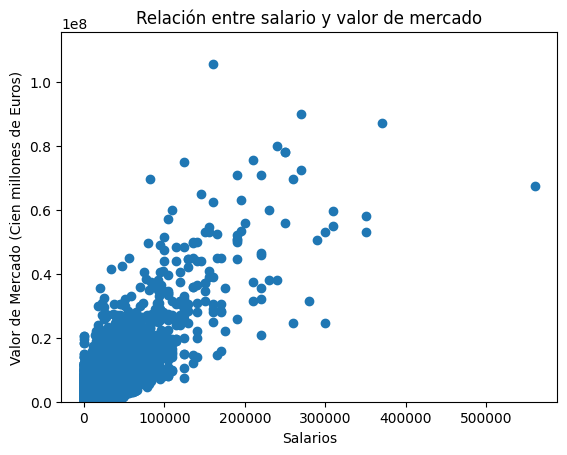

In [12]:
x = df["wage_eur"]
y = df["value_eur"]
plt.scatter(x, y)
plt.xlabel('Salarios')
plt.ylabel('Valor de Mercado (Cien millones de Euros)')
plt.title('Relación entre salario y valor de mercado')
plt.ylim(min(y), max(y) + 10000000)


plt.show()

Esta claro por el gráfico que el precio de mercado de los jugadores no está enteramente determinado por su salario, sin embargo si puede observarse una relacion lineal sustancial entre ambas variables.
Debo entonces encontrar la recta que mejor se ajuste a los datos observados.
Para calcular la recta de regresión debo aplicar el método de Mínimos cuadrados.
La línea de mínimos cuadrados tiene la ecuación:
$$
\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x

$$



Tengo que estimar los valores de $\hat{\beta}_0 + \hat{\beta}_1$ para encontrar la recta de regresión.
Para eso voy a calcular una serie de variables.

In [13]:
n = df["wage_eur"].count()
sum_x = df["wage_eur"].sum()
media_x = df["wage_eur"].mean()
sum_y = df["value_eur"].sum()
media_y = df["value_eur"].mean()
suma_multiplicaciones = (df['wage_eur'] * df['value_eur']).sum()
sum_cuadrados_x = (df["wage_eur"] ** 2).sum()
sum_cuadrados_y = (df["value_eur"] ** 2).sum()

Con estos valores, puedo calcular $S_{xy}$ y $S_{xx}$ y, con estos, calcular la pendiente y la ordenada de mi recta de regresion:

In [14]:
Sxy = suma_multiplicaciones - (sum_x * sum_y / n)
Sxx = sum_cuadrados_x - (sum_x ** 2) / n
pendiente = Sxy/Sxx
ordenada = media_y - pendiente * media_x

imprimir_markdown(f"Entonces, la ecuación de la recta queda:")
imprimir_markdown("$\\hat{y} = \\hat{\\beta}_0 + \\hat{\\beta}_1 x$")

imprimir_markdown(f"$\\hat{{y}} = {ordenada} + {pendiente} \\cdot x$")

Entonces, la ecuación de la recta queda:

$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$

$\hat{y} = 332598.8216281582 + 218.10127217079443 \cdot x$

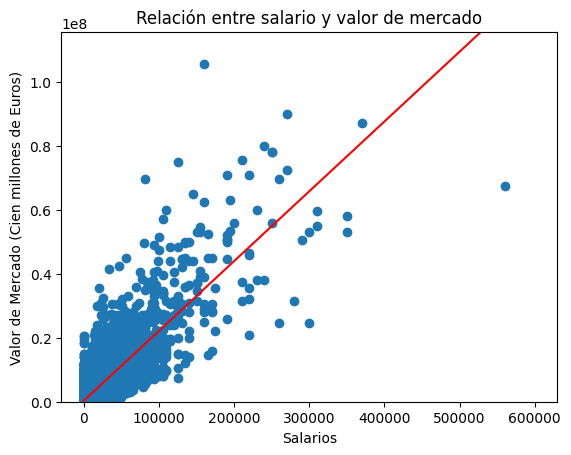

In [15]:
x = df["wage_eur"]
y = df["value_eur"]
plt.scatter(x, y)
valores_x = np.linspace(0,600000, 200)
valores_y = pendiente * valores_x + ordenada
# Dibujar la recta en el gráfico
plt.plot(valores_x, valores_y, color='red', label='Recta de regresión')
plt.xlabel('Salarios')
plt.ylabel('Valor de Mercado (Cien millones de Euros)')
plt.title('Relación entre salario y valor de mercado')
plt.ylim(min(y), max(y) + 10000000)


plt.show()

In [16]:

def predecir(X):
    return ordenada + pendiente * X

df["valor_pred"] = predecir(df["wage_eur"])
columnas = ["valor_pred", "wage_eur", "value_eur"]
df[columnas].head()


,valor_pred,wage_eur,value_eur
0,1.224693e+08,560000,67500000
1,4.831488e+07,220000,46000000
2,2.759526e+07,125000,75000000
3,5.267690e+07,240000,80000000
4,5.921994e+07,270000,90000000


Calculado el modelo de regresión, es decir la recta de la forma $\hat{\beta}_0 + \hat{\beta}_1$, ahora podemos calcular $\sigma^2$ que determina la cantidad de variabilidad en el modelo de regresión. Para eso tenemos que calcular la Suma de Cuadrados de Error (SCE), que podemos hacerlo a partir de los valores de $S_{yy}$, $S_{xy}$ y $S_{xx}$. Ya contamos con todos los valores salvo Syy, así que lo calculamos.

La formula para calcular $S_{yy}$ es:
$$S_{yy} = \sum_{i=1}^n (y_i - \bar{y})^2$$

Que es equivalente a $$S_{yy} = \sum_{i=1}^{n} y_i^2 - 2 \bar{y} . \sum_{i=1}^{n} y_i + \bar{y}^2 * n$$ con valores que ya tenemos calculados


In [17]:
Syy = sum_cuadrados_y - 2 * media_y * sum_y + (media_y **2) * n

Ahora, con $S_{yy}$ calculado, podemos calcular SCE, para lo cual vamos a usar la siguiente formula
$$SCE = S_{yy} - \frac{(S_{xy})^2}{S_{xx}}$$


In [18]:
SCE = Syy - (Sxy)**2 / Sxx

Ya con SCE podemos calcular el estimador insesgado de $\sigma^2$ con la formula:
$$\hat{\sigma^2} = \frac{SCE}{n - 2}$$

In [19]:
sigma_cuadrado = SCE / (n-2)
imprimir_markdown(f"El valor del estimador insesgado de $\\sigma^2$ es {sigma_cuadrado}")

El valor del estimador insesgado de $\sigma^2$ es 7659701501485.309

I) **Prueba de significancia de regresión, coeficiente de determinación (R2) y correlación lineal (r).**

Para calcular el coeficiente de determinación, denotado por $R^2$ debemos usar la formula
$$R^2 = 1 - \frac{SCE}{STC}$$

Donde STC, la Suma Total de Cuadrados, no es otra cosa que nuestra variable ya calculada $S_{yy}$

In [20]:
coef_determinación = 1 - (SCE/Syy)
imprimir_markdown(f"El coeficiente de determinacion $R^2$ es {coef_determinación}")

El coeficiente de determinacion $R^2$ es 0.7058117817091277

Como sabemos mientras más alto es el valor de $R^2$, que será un número entre 0 y 1, mejor será nuestro modelo de regresión lineal simple al explicar la variación de y.

El coeficiente de correlacion linea r es la medida que podemos usar para describir qué tan fuerte es la relación lineal entre dos variables x e y, en nuestro caso, el salario de un jugador y su valor en el mercado. Una de las formas de calcular su valor es: $$r = \sqrt{R^2}$$


In [21]:
coef_cor_lineal = math.sqrt(coef_determinación)
imprimir_markdown(f"El coeficiente de correlación lineal r es {coef_cor_lineal}")

El coeficiente de correlación lineal r es 0.8401260510834834

Como el valor es positivo y cercano a 1, podemos hablar de una correlación positiva fuerte.

Para complementar, podemos utilizar otras herramientas de Python que realizan solo los calculos.

In [22]:
from scipy.stats import pearsonr

correlacion, p_valor = pearsonr(x, y)
print(f"Correlación lineal (r): {correlacion}")
print(f"P-valor de la prueba de significancia: {p_valor}")

Correlación lineal (r): 0.8401260510834833
P-valor de la prueba de significancia: 0.0


Como vemos, el calculo de la correlación lineal es el mismo, y el p-valor de la prueba de significancia, si bien solo nos muestra un decimal, podemos saber que es muy bajo, por lo que nos permite decir que la regresión es muy significativa

II) **Inferencias sobre los parámetros de la recta, estimando las fluctuaciones con una confianza del 95%.**

Puedo calcular la varianza de los coeficientes $\hat{\beta}_0$ y $\hat{\beta}_1$ con las siguientes formulas. 
$$ V(\hat{\beta}_1)= \frac{\sigma^2}{S_{xx}} \qquad \qquad V(\hat{\beta}_0)= \sigma^2 (\frac{1}{n} + \frac{\bar{x}^2}{S_{xx}})$$

In [23]:
varianza_b1 = sigma_cuadrado/Sxx
varianza_b0 = sigma_cuadrado * (1/n + media_x **2/Sxx)

imprimir_markdown(f"La varianza de $\\hat{{\\beta}}_1$ es {varianza_b1:.4f}")
imprimir_markdown(f"La varianza de $\\hat{{\\beta}}_0$ es {varianza_b0:.4f}")

La varianza de $\hat{\beta}_1$ es 1.0467

La varianza de $\hat{\beta}_0$ es 483120305.6728

**Inferencias sobre $\hat{\beta}_1$**  

Voy a calcular el intervalo de confianza $\hat{\beta}_1$ de con un 95%. Para eso, primero voy a calcular el error estandar, los grados de libertad, el nivel de significancia y el valor critico de la distribución t de Student. Con esos valores, voy a calcular el intervalo de confianza.

In [24]:
import scipy.stats as stats
SE_beta_1 = np.sqrt(varianza_b1)

alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df= n-2)
# Intervalos de confianza
CI_beta_1 = (pendiente - t_critical * SE_beta_1, pendiente + t_critical * SE_beta_1)
imprimir_markdown(f"Intervalo de confianza para $\\hat{{\\beta}}_1$ al 95% es {CI_beta_1}")


Intervalo de confianza para $\hat{\beta}_1$ al 95% es (np.float64(216.09592619169877), np.float64(220.1066181498901))

Ahora, puedo calcular un test de hipótesis para $\beta_1$. Para eso primero debo formular las hipótesis:

**Hipótesis nula $H_{0}$:** $\beta_1$=0 (no hay efecto de X sobre Y)  
**Hipótesis alternativa $H_{a}$:** $\beta_1 \neq$ 0 (hay un efecto de X sobre Y)  
Ahora debo calcular el valor del estadístico de prueba T

In [25]:
estadisitico_t = (pendiente - 0) / SE_beta_1

Con el estadistico T calculado y con el valor critico solo me queda establecer la regla y evaluar

In [26]:
if abs(estadisitico_t) > t_critical:
    print(f"Rechazamos H0: t = {estadisitico_t:.4f} es mayor que t crítico = {t_critical:.4f}, por lo tanto existe una relación lineal significativa")
else:
    print(f"Aceptamos H0: t = {estadisitico_t:.4f} es menor o igual que t crítico = {t_critical:.4f}, por lo tanto no hay evidencia suficiente para concluir que existe relación lineal")

Rechazamos H0: t = 213.1792 es mayor que t crítico = 1.9601, por lo tanto existe una relación lineal significativa


**Inferencias sobre $\hat{\beta}_0$**  

Voy a calcular el intervalo de confianza $\hat{\beta}_0$ de con un 95%. Para eso, voy a hacer los mismos calculos que para $\hat{\beta}_1$, con las formulas que correspondan. Como ya calculé la varianza, el código va a verse muy similar.

In [27]:
SE_beta_0 = np.sqrt(varianza_b0)
# Intervalos de confianza
CI_beta_0 = (ordenada - t_critical * SE_beta_0, ordenada + t_critical * SE_beta_0)
imprimir_markdown(f"Intervalo de confianza para $\\hat{{\\beta}}_0$ al 95% es {CI_beta_0}")

Intervalo de confianza para $\hat{\beta}_0$ al 95% es (np.float64(289516.06453454983), np.float64(375681.5787217666))

III) **La proporción de veces que el valor de mercado supera la incertidumbre de predicción comparada con la respuesta media del valor de mercado para una característica fija, ambas con la misma confianza y ancho mínimo** 

In [28]:
# Calcular la incertidumbre de predicción (SEP) con ancho minimo
SEP = np.sqrt(sigma_cuadrado * (1 + (1/n) + ((media_x - media_x) ** 2) / Sxx))
# Calcular el margen de error
margen_error = t_critical * SEP

supera = 0
for i in range(n):
  if df['value_eur'].iloc[i] > df['valor_pred'].iloc[i] + margen_error or df['value_eur'].iloc[i] < df['valor_pred'].iloc[i] - margen_error:
    supera += 1

# Proporción
proporcion_supera = supera / n

# Mostrar proporción
imprimir_markdown(f"La proporción de veces que el valor de mercado supera la incertidumbre de predicción: {proporcion_supera* 100:.2f}%")

#Tambien lo puedo calcular asi
# Calcular el límite inferior y superior del intervalo de predicción
df['limite_inferior'] = df['valor_pred'] - margen_error
df['limite_superior'] = df['valor_pred'] + margen_error

# Verificar si el valor de mercado está fuera del intervalo de predicción
df['supera_incertidumbre'] = (df['value_eur'] < df['limite_inferior']) | (df['value_eur'] > df['limite_superior'])

# Calcular la proporción de veces que el valor de mercado supera la incertidumbre de predicción
proporcion_supera = df['supera_incertidumbre'].mean()

imprimir_markdown(f"Proporción de veces que el valor de mercado supera la incertidumbre de predicción: {proporcion_supera * 100:.2f}%")


La proporción de veces que el valor de mercado supera la incertidumbre de predicción: 4.49%

Proporción de veces que el valor de mercado supera la incertidumbre de predicción: 4.49%

## Parte 2: Ecuación de predicción del valor de mercado ##

### b) Ecuación para predecir el valor de mercado del jugador a partir de varias características. ###

Elegimos como características la edad, el valor total, el potencial y el valor de movimientos de habilidad

In [40]:
df_subconjunto = df[['age', 'overall', 'potential','skill_moves', 'value_eur']]
df_subconjunto.head()

,age,overall,potential,skill_moves,value_eur
0,33,93,93,4,67500000
1,35,92,92,5,46000000
2,27,91,93,1,75000000
3,31,91,91,4,80000000
4,28,91,91,5,90000000


I) **Usando el método de mínimos cuadrados. Explica los indicadores obtenidos (como el coeficiente de determinación y la correlación) y proporciona una breve interpretación de los resultados.**

In [39]:
# Definir las variables independientes X y la variable dependiente Y
X = df_subconjunto[['age', 'overall', 'potential','skill_moves']].values
y = df_subconjunto['value_eur'].values
# Normalizar los datos (media 0 y desviación estándar 1)
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std
# Normalizar también la variable objetivo (y) si los valores son grandes
y_mean = np.mean(y)
y_std = np.std(y)
y = (y - y_mean) / y_std
# Añadir una columna de unos (intercepto)
X = np.c_[np.ones(X.shape[0]), X]
# Resolver usando la ecuación normal: theta = (X^T * X)^-1 * X^T * y
theta_minimos_cuadrados = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
# Mostrar los coeficientes obtenidos
imprimir_markdown(f"**Coeficientes obtenidos mediante el método de mínimos cuadrados:**<br>{theta_minimos_cuadrados}")

**Coeficientes obtenidos mediante el método de mínimos cuadrados:**<br>[-4.97865638e-16 -1.85999564e-01  6.35931347e-01  1.09427318e-01
  3.04228185e-02]

In [31]:
# Predicciones del modelo usando los coeficientes obtenidos por mínimos cuadrados
predicciones_minimos_cuadrados = X.dot(theta_minimos_cuadrados)

# Cálculo del coeficiente de determinación (R²)
ss_residual = np.sum((y - predicciones_minimos_cuadrados) ** 2)  # SS_residual
ss_total = np.sum((y - np.mean(y)) ** 2)  # SS_total
r2_minimos_cuadrados = 1 - (ss_residual / ss_total)

# Mostrar el coeficiente de determinación (R²)
imprimir_markdown(f"*Coeficiente de determinación (R²) para el método de mínimos cuadrados:* {r2_minimos_cuadrados}")

# Cálculo de la correlación de Pearson entre los valores predichos y los valores reales
correlacion_minimos_cuadrados = np.corrcoef(predicciones_minimos_cuadrados, y)[0, 1]

# Mostrar la correlación
imprimir_markdown(f"*Correlación entre predicciones y valores reales (método de mínimos cuadrados):* {correlacion_minimos_cuadrados}")

*Coeficiente de determinación (R²) para el método de mínimos cuadrados:* 0.4564060310027038

*Correlación entre predicciones y valores reales (método de mínimos cuadrados):* 0.6755782937622433

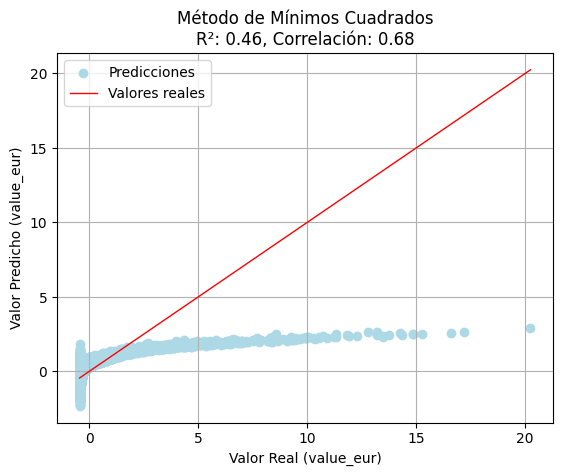

In [32]:
# Predicciones vs valores reales para mínimos cuadrados
plt.scatter(y, predicciones_minimos_cuadrados, color='lightblue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=1, label='Valores reales')
plt.xlabel('Valor Real (value_eur)')
plt.ylabel('Valor Predicho (value_eur)')
plt.title(f'Método de Mínimos Cuadrados\nR²: {r2_minimos_cuadrados:.2f}, Correlación: {correlacion_minimos_cuadrados:.2f}')
plt.legend()
plt.grid(True)
plt.show()

Puntos: Son las predicciones del modelo frente a los valores reales. Si el modelo es perfecto, todos los puntos deberían alinearse perfectamente con la línea roja (que representa el caso ideal donde predicción = valor real).

Línea roja: Es una referencia ideal (predicción = valor real). Mientras más cerca estén los puntos a esta línea, mejor es el ajuste del modelo.

En el título se incluye tanto el **coeficiente de determinación (R²)** como la **correlación**.

II) **Usando el método de descenso por gradiente.**  
¿Son los valores obtenidos iguales a los conseguidos mediante la resolución del sistema de ecuaciones normales? Muestra los resultados obtenidos junto con las últimas iteraciones del algoritmo. Indica los valores de los parámetros utilizados (como tasa de aprendizaje y número de iteraciones).
<br><br>
Implementación del descenso por gradiente: vamos a utilizar el código del descenso por gradiente con las iteraciones solicitadas y comparar los resultados con los obtenidos a través de mínimos cuadrados.

In [33]:
# Parámetros del descenso por gradiente
learning_rate = 0.001  # Tasa de aprendizaje 
n_iteraciones = 1500  # Número de iteraciones

# Inicializar los coeficientes (theta) a ceros
theta_gradiente = np.zeros(X.shape[1])

# Número de ejemplos
m = len(y)

# Historial del costo
historial_costos = []
theta_history = []

start_time = time.process_time()
for i in range(n_iteraciones):
    # Calcular predicciones y errores
    predictions = X.dot(theta_gradiente)
    errors = predictions - y
    
    # Calcular el gradiente y actualizar los coeficientes
    gradients = (2/m) * X.T.dot(errors)
    theta_gradiente -= learning_rate * gradients
    
     # Almacenar el valor actual de theta
    theta_history.append(theta_gradiente.copy())

    # Calcular el costo (error cuadrático medio)
    cost = (1/m) * np.sum(errors ** 2)
    historial_costos.append(cost)
    
    # Mostrar las últimas iteraciones
    if i >= n_iteraciones - 10:
        print(f"Iteración {i+1}: Costo = {cost}, Coeficientes = {theta_gradiente}")

# Mostrar los coeficientes finales
print(f"Coeficientes finales (theta): {theta_gradiente}")

# Tiempo de ejecución
end_time = time.process_time()
print(f"Tiempo de ejecución: {end_time - start_time:.6f} segundos")

Iteración 1491: Costo = 0.5530260747437858, Coeficientes = [ 3.47566617e-17 -9.02737785e-03  3.91395663e-01  3.06556296e-01
  6.70124980e-02]
Iteración 1492: Costo = 0.5530225670534936, Coeficientes = [ 3.47326569e-17 -9.05359362e-03  3.91440218e-01  3.06544313e-01
  6.69862522e-02]
Iteración 1493: Costo = 0.5530190631642875, Coeficientes = [ 3.48106726e-17 -9.07980164e-03  3.91484743e-01  3.06532300e-01
  6.69600354e-02]
Iteración 1494: Costo = 0.5530155630653186, Coeficientes = [ 3.48706846e-17 -9.10600192e-03  3.91529240e-01  3.06520255e-01
  6.69338475e-02]
Iteración 1495: Costo = 0.5530120667457793, Coeficientes = [ 3.44145930e-17 -9.13219448e-03  3.91573707e-01  3.06508180e-01
  6.69076886e-02]
Iteración 1496: Costo = 0.553008574194904, Coeficientes = [ 3.46306364e-17 -9.15837931e-03  3.91618146e-01  3.06496075e-01
  6.68815585e-02]
Iteración 1497: Costo = 0.5530050854019685, Coeficientes = [ 3.44385978e-17 -9.18455643e-03  3.91662555e-01  3.06483939e-01
  6.68554573e-02]
Iteraci

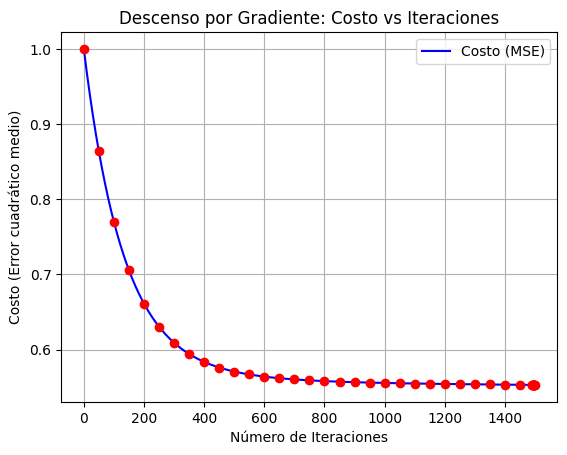

In [34]:
# Graficar la función de costo vs iteraciones
plt.plot(range(n_iteraciones), historial_costos, color='blue', label='Costo (MSE)')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo (Error cuadrático medio)')
plt.title('Descenso por Gradiente: Costo vs Iteraciones')

# Añadir puntos en cada iteración
for i in range(n_iteraciones):
    if i % 50 == 0 or i >= n_iteraciones - 10:  # Puntos para iteraciones clave
        plt.scatter(i, historial_costos[i], color='red', zorder=5)

plt.legend()
plt.grid(True)
plt.show()

Gráfico del costo por iteraciones del descenso por gradiente  
Para visualizar cómo el costo (error cuadrático medio) disminuye a lo largo de las iteraciones:

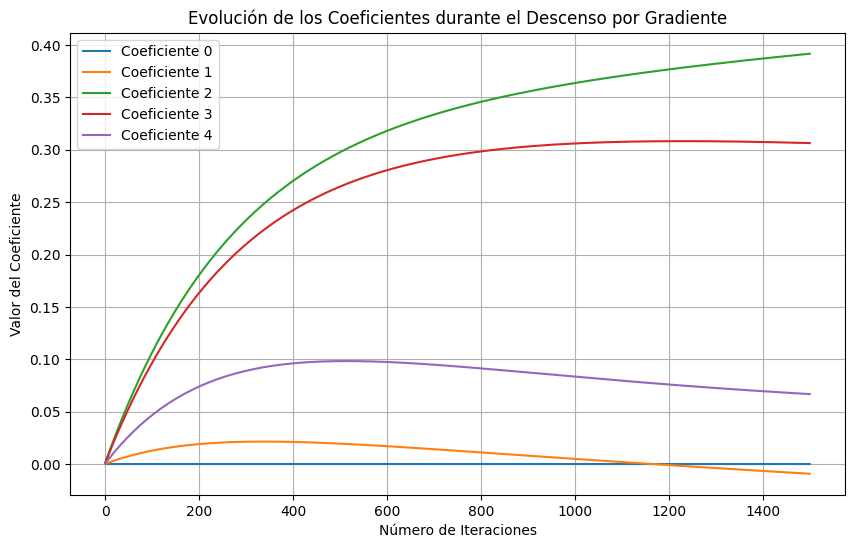

In [35]:
# Cambios en los coeficientes en las últimas iteraciones
plt.figure(figsize=(10, 6))
for j in range(len(theta_gradiente)):
    plt.plot(range(n_iteraciones), [theta_history[i][j] for i in range(n_iteraciones)], label=f'Coeficiente {j}')
plt.xlabel('Número de Iteraciones')
plt.ylabel('Valor del Coeficiente')
plt.title('Evolución de los Coeficientes durante el Descenso por Gradiente')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Coeficientes finales
imprimir_markdown(f"**Coeficientes obtenidos mediante descenso por gradiente:**\n{theta_gradiente}")

**Coeficientes obtenidos mediante descenso por gradiente:**
[ 3.44385978e-17 -9.26304160e-03  3.91795609e-01  3.06447348e-01
  6.67773267e-02]

Comparación con el método de mínimos cuadrados

El método de mínimos cuadrados ya fue implementado antes y los coeficientes se pueden comparar directamente con los obtenidos por el descenso por gradiente.

In [37]:
# Comparacion entre coeficientes obtenidos por mínimos cuadrados y por descenso por gradiente
imprimir_markdown(f"**Coeficientes (Mínimos Cuadrados):** {theta_minimos_cuadrados}")
imprimir_markdown(f"**Coeficientes (Descenso por Gradiente):** {theta_gradiente}")

**Coeficientes (Mínimos Cuadrados):** [-4.97865638e-16 -1.85999564e-01  6.35931347e-01  1.09427318e-01
  3.04228185e-02]

**Coeficientes (Descenso por Gradiente):** [ 3.44385978e-17 -9.26304160e-03  3.91795609e-01  3.06447348e-01
  6.67773267e-02]

III) **Da una interpretación del criterio de corte utilizado en el algoritmo del gradiente. Explica si presenta alguna falla. Si no es una buena condición de corte, ¿puedes sugerir un criterio alternativo más eficaz?**

El criterio de corte en el algoritmo de descenso por gradiente que implementamos se basa en un número fijo de iteraciones (n_iteraciones). El algoritmo realiza un número predeterminado de actualizaciones de los coeficientes (theta), y al finalizar, se obtiene el costo final y los coeficientes.
Este criterio es fácil de implementar y entender. Solo se necesita definir un número fijo de iteraciones, y además cada ejecución del algoritmo se completa en un número conocido de pasos, lo que permite un análisis de tiempo y rendimiento predecible.  
El problema es que si la tasa de aprendizaje es demasiado alta o demasiado baja, el algoritmo puede converger muy rápido (sin alcanzar el óptimo) o muy lento, lo que puede resultar en un costo que no se minimiza de manera efectiva dentro del número de iteraciones fijado.
Otro problema es que este criterio no tiene en cuenta si el costo ha dejado de cambiar significativamente; va a iterar si o si todas las veces que le indicamos, por lo tanto, podría seguir iterando innecesariamente.
<br>

Un enfoque más eficaz sería utilizar un criterio de **corte basado en la convergencia del costo**, en lugar de fijar un número de iteraciones, el algoritmo podría detenerse cuando el costo disminuye menos de un cierto umbral (epsilon) entre iteraciones consecutivas. Esto nos ahorraría el problema de iteraciones innecesarias. Por ejemplo:

In [41]:
epsilon = 1e-6  
for i in range(n_iteraciones):
       if i > 0 and abs(historial_costos[-1] - historial_costos[-2]) < epsilon:
           print(f"Convergencia alcanzada en la iteración {i+1}")
           break

## Parte 3: Comportamiento del método de descenso por gradiente ##  
**c) Convergencia del método de descenso por gradiente.**  
Explicar si el método siempre converge al mínimo de la función. En caso contrario, proporciona un contraejemplo para ilustrar este comportamiento.
  
No, el método no siempre converge mínimo de la función, deben darse ciertas condiciones para que se dé esta convergencia. Hay dos cuestiones a tener en cuenta: en primer lugar lugar, si la función es convexa o no. En las funciones convexas, el descenso por gradiente converge al mínimo global porque cualquier mínimo local es también un mínimo global; entonces, no importa desde donde arranqué el algortimo, siempre va a llegar al mínimo global. En las funciones no convexas, en cambio, el descenso por gradiente puede converger a un mínimo local que no necesariamente es el mínimo global, y el algoritmo finalizaría ahí porque, en esas areas donde el gradiente es casi cero, no se producen actualizaciones importantes en los coeficientes. La otra cuestión importante a tener en cuenta es la tasa de aprendizaje, ya que si la tasa es, por ejemplo, demasiado alta, el algoritmo puede divergir y variar, sin converger; en cambio, si es demasiado baja puede converger muy lentamente, debiendo hacer muchas iteraciones.  

Un **contraejemplo para ilustrar este comportamiento** puede ser la Función $$f(x) = sin(x)$$

La función seno no tiene un mínimo global único, ya que al ser periodica, los mínimos locales se repiten infinitamente. Esto significa que, dependiendo de la elección del punto inicial, el método de descenso por gradiente podría converger a diferentes mínimos locales en lugar de encontrar el mínimo global.
Si empezamos en un punto donde sin(x) es positivo, el método de descenso por gradiente puede llevarnos a un mínimo local.
Sin embargo, si comenzamos en un punto que ya está en el rango negativo, puede exisitr un mínimo local, pero no converger en un minimo local, ya que esta seguirá variando.


El ejemplo de la función seno nos demuestra entonces que el método de descenso por gradiente no siempre converge al mínimo de la función: de nuevo, como tiene un conjunto infinito de mínimos locales repetidos, dependiendo del punto de inicio, el método de descenso por gradiente podría converger a diferentes mínimos locales.